In [2]:
import numpy as np
import pandas as pd
from pyedflib import highlevel

In [2]:
dataset_dir = "./Acquired Dataset"
user_data = {"sn": [], "age": [], "sex": [], "category": []}

for d in os.listdir(dataset_dir):
    with open(f"{dataset_dir}/{d}/userfile.gnr", 'r') as user_file:
        user_data["sn"].append(int(d))

        user_info = user_file.readlines()
        
        age = (user_info[3].strip()).split("=")[-1]
        user_data["age"].append(age)
        
        sex = (user_info[4].strip()).split("=")[-1]
        user_data["sex"] .append(sex)
        
        category = (user_info[5].strip()).split("=")[-1]
        user_data["category"] .append(category)        
        
user_df = pd.DataFrame(user_data)
user_df

,sn,age,sex,category
0,1,44,M,Control
1,10,74,F,Patient
2,11,22,F,Control
3,12,28,F,Control
4,13,23,F,Control
5,14,22,F,Patient
6,15,57,F,Patient
7,16,39,F,Patient
8,17,39,M,Control
9,18,52,F,Patient


In [7]:
user_df.to_csv("./Acquired Dataset/user_info.csv", index=False)

In [8]:
user_df.category.value_counts()

category
Patient    18
Control    14
Name: count, dtype: int64

In [5]:
edf_file_path = f"Acquired Dataset/1/16/Phase 2.edf"

raw = mne.io.read_raw_edf(edf_file_path, preload=True)

raw_data = raw.get_data()

raw_data


Extracting EDF parameters from c:\Users\Victor Momodu\Documents\Programming\Software Engineering\Code\AI-Driven-EEG-Schizophrenia-Diagnosis\Acquired Dataset\1\16\Phase 2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 499  =      0.000 ...     4.990 secs...


array([[ 7.85714286e-06,  7.85714286e-06,  7.93650794e-08, ...,
        -1.34920635e-06,  1.34920635e-06,  1.34920635e-06],
       [ 1.50793651e-06,  1.50793651e-06,  1.66666667e-06, ...,
         2.46031746e-06,  1.19047619e-06,  1.19047619e-06],
       [ 8.80952381e-06,  8.80952381e-06, -1.19047619e-06, ...,
        -2.30158730e-06, -2.38095238e-07, -2.38095238e-07],
       ...,
       [-3.25000000e-04, -3.25000000e-04, -3.25000000e-04, ...,
        -3.25000000e-04, -3.25000000e-04, -3.25000000e-04],
       [-3.25000000e-04, -3.25000000e-04, -3.25000000e-04, ...,
        -3.25000000e-04, -3.25000000e-04, -3.25000000e-04],
       [-7.53968254e-06, -7.53968254e-06, -7.53968254e-06, ...,
        -3.21825397e-04, -3.21825397e-04, -3.21825397e-04]])

In [1]:
! pip list

Package            Version
------------------ ----------
asttokens          2.4.1
certifi            2023.11.17
charset-normalizer 3.3.2
colorama           0.4.6
comm               0.2.0
contourpy          1.2.0
cycler             0.12.1
debugpy            1.8.0
decorator          5.1.1
defusedxml         0.7.1
exceptiongroup     1.2.0
executing          2.0.1
fonttools          4.45.1
idna               3.6
ipykernel          6.26.0
ipython            8.18.0
jedi               0.19.1
Jinja2             3.1.2
jupyter_client     8.6.0
jupyter_core       5.5.0
kiwisolver         1.4.5
lazy_loader        0.3
MarkupSafe         2.1.3
matplotlib         3.8.2
matplotlib-inline  0.1.6
mne                1.6.0
nest-asyncio       1.5.8
numpy              1.26.2
packaging          23.2
parso              0.8.3
Pillow             10.1.0
pip                23.3.1
platformdirs       4.0.0
pooch              1.8.0
prompt-toolkit     3.0.41
psutil             5.9.6
pure-eval          0.2.2
pyEDFlib 

In [16]:
import os

for i in range(1, 33):
    if len(os.listdir(f"Acquired Dataset/{i}")) < 3:
        print(len(os.listdir(f"Acquired Dataset/{i}")))


In [3]:
from pyedflib import highlevel
import pandas as pd

signals, signal_headers, headers = highlevel.read_edf("Acquired Dataset/1/16/Phase 1.edf")
print(signals)
print(signal_headers)
print(headers)


[[ 5.00000000e+00  5.00000000e+00  7.14285714e-01 ... -5.15873016e+00
  -7.93650794e-02 -7.93650794e-02]
 [ 5.55555556e-01  5.55555556e-01  1.34920635e+00 ...  1.34920635e+00
   1.82539683e+00  1.82539683e+00]
 [-6.42857143e+00 -6.42857143e+00 -1.37301587e+01 ... -4.68253968e+00
  -1.34920635e+00 -1.34920635e+00]
 ...
 [-3.25000000e+02 -3.25000000e+02 -3.25000000e+02 ... -3.25000000e+02
  -3.25000000e+02 -3.25000000e+02]
 [-3.25000000e+02 -3.25000000e+02 -3.25000000e+02 ... -3.25000000e+02
  -3.25000000e+02 -3.25000000e+02]
 [-7.53968254e+00 -7.53968254e+00 -7.53968254e+00 ... -3.21825397e+02
  -3.21825397e+02 -3.21825397e+02]]
[{'label': 'Fp1[1]', 'dimension': 'uV', 'sample_rate': 100.0, 'sample_frequency': 100.0, 'physical_max': 325.0, 'physical_min': -325.0, 'digital_max': 4095, 'digital_min': 0, 'prefilter': '', 'transducer': 'AgAgCl electrodes'}, {'label': 'Fp2[2]', 'dimension': 'uV', 'sample_rate': 100.0, 'sample_frequency': 100.0, 'physical_max': 325.0, 'physical_min': -325.0, '

In [17]:
electrodes = [s["label"] for s in signal_headers]
electrodes

['Fp1[1]',
 'Fp2[2]',
 'F3[3]',
 'F4[4]',
 'C3[5]',
 'C4[6]',
 'P3[7]',
 'P4[8]',
 'O1[9]',
 'O2[10]',
 'F7[11]',
 'F8[12]',
 'T3[13]',
 'T4[14]',
 'T5[15]',
 'T6[16]',
 'Fz[17]',
 'Pz[18]',
 'Cz[19]',
 'Pg1[20]',
 'Pg2[21]',
 'EOGR[22]',
 'EOOGL[23]',
 'EMG[24]']

In [12]:
len(signals[1])

500

In [26]:
from pyedflib import highlevel
import pandas as pd

import numpy as np

In [44]:
acquired_dataset_dir = "Acquired Dataset"
for participant in os.listdir(acquired_dataset_dir):
    if not os.path.exists(f"Output EEG Data/{participant}"):
        os.mkdir(f"Output EEG Data/{participant}")
    
    all_items = os.listdir(f"{acquired_dataset_dir}/{participant}")
    folders = [item for item in all_items if os.path.isdir(os.path.join(acquired_dataset_dir, item))]
    
    done = False
    for f in folders:
        num_phases = len(os.listdir(f"{acquired_dataset_dir}/{participant}/{f}"))
        if num_phases == 4:
            done = True
            for i in range(1, 5):
                edf_file_path = f"{acquired_dataset_dir}/{participant}/{f}/Phase {i}.edf"
                sgnls, _, _ = highlevel.read_edf(edf_file_path)
                transposed_signals = np.transpose(sgnls)
                pd.DataFrame(transposed_signals, columns=electrodes).to_csv(f"Output EEG Data/{participant}/Phase {i}.csv")
               
        if done:      
            break
               
        
               

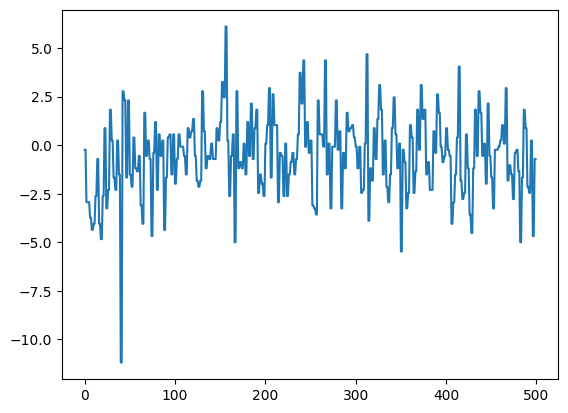

In [15]:
import matplotlib.pyplot as plt

plt.plot(signals[6])